# Data Preperation

## 0 Dependencies

In [1]:
import pandas as pd

# Encoding
from sklearn.preprocessing import LabelEncoder

# Outlier plotting
import matplotlib as mpl

# Mulitoco
import matplotlib.pyplot as plt
import seaborn as sns

# VIF analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1 Data import

Note: We assume, that this notebook is in the same directory as the unzipped "TU" folder which conains all data. There are many columns that have mixed value types. We will take care of this later using an encoder. For now, we import all columns as Strings to avoid warnings.

In [2]:
cookie_data = pd.read_csv('./TU/Cookie.csv', sep=';', skiprows=[1], dtype='string')
cookie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252254 entries, 0 to 252253
Columns: 109 entries, userid_1 to lead_model2
dtypes: string(109)
memory usage: 209.8 MB


## 2 Handle NAs

We assume, that NAs in columns which start with "conf_started_..." or "conf_ended_..." indicates no configuration started. We can model that with a zero instead of a NA.

Also, we must remove all NAs from column "lead_model2" for later use. Since only 38 rows have NAs in the "lead_model2" column, we decided to drop these rows.

As a last option, we drop all columns that still contain any NAs.

In [3]:
for i in cookie_data.columns:
    if 'conf_' in i:
        cookie_data[i].fillna('0', inplace=True)


cookie_data = cookie_data.dropna(subset=['lead_model2'])
print("NA rows in 'lead_model2' left:", cookie_data['lead_model2'].isna().sum())
print(cookie_data.shape)


cookie_data = cookie_data.dropna(axis='columns')
print("Number of columns left:", len(cookie_data.columns))
print('')
print("Columns left:")
print(*cookie_data.columns, sep="\n")
print(cookie_data.shape)

NA rows in 'lead_model2' left: 0
(252216, 109)
Number of columns left: 45

Columns left:
userid_1
visitsmonth1
visitsmonth2
visitsmonth3
visitsmonth6
city
zipcode
carsearch
conf_start_iv4
conf_start_gulfvar
conf_start_upper
conf_start_polnew
conf_start_pol
conf_start_crossing
conf_start_iv3
conf_start_golf
conf_start_croc
conf_start_tour
conf_start_tiga
conf_start_pass
conf_start_art
conf_start_shar
conf_start_touar
conf_start_tig
conf_end_iv4
conf_end_gulfvar
conf_end_upper
conf_end_polnew
conf_end_pol
conf_end_crossing
conf_end_iv3
conf_end_golf
conf_end_croc
conf_end_tour
conf_end_tiga
conf_end_pass
conf_end_art
conf_end_shar
conf_end_touar
conf_end_tig
days_since_visit
sessionsnbr
lead_general
lead_model1
lead_model2
(252216, 45)


## 3 Remove Columns With Repetetive Information

The columns "zipcode" and "city" basically encode the same information. Since zipcodes are more specific, we keep them and drop the "city" column instead.

In [4]:
cookie_data = cookie_data.drop(columns=['city'])

## 4 Encode Strings Into Integers

In [5]:
cookie_data_encoded = cookie_data.copy()
le = LabelEncoder()

for col in cookie_data:
    # col referes to the column names   
    try:
        cookie_data_encoded[col] = pd.to_numeric(cookie_data[col])
    except:
        # We have string entries we cant turn into numericals automatically -> encode!
        cookie_data_encoded[col] = le.fit_transform(cookie_data[col])

cookie_data_encoded

,userid_1,visitsmonth1,visitsmonth2,visitsmonth3,visitsmonth6,zipcode,carsearch,conf_start_iv4,conf_start_gulfvar,conf_start_upper,...,conf_end_pass,conf_end_art,conf_end_shar,conf_end_touar,conf_end_tig,days_since_visit,sessionsnbr,lead_general,lead_model1,lead_model2
0,1,0,0,0,1,4000,0,0,0,0,...,0,0,0,0,0,139,1,0,0,0
1,2,0,0,0,0,7673,0,0,0,0,...,0,0,0,0,0,203,1,0,0,0
2,3,0,0,0,1,5270,0,0,0,0,...,0,0,0,0,0,152,1,0,0,0
3,4,0,1,1,1,5452,0,0,0,0,...,0,0,0,0,0,43,1,0,0,0
4,5,0,0,0,2,6949,0,0,0,0,...,0,0,0,0,3,124,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252249,252250,0,0,0,0,5998,0,0,0,0,...,0,0,0,0,0,223,2,1,9,0
252250,252251,2,2,2,2,1844,0,0,0,0,...,0,0,0,0,0,5,2,1,13,0
252251,252252,0,0,0,2,1767,0,0,0,0,...,0,0,0,0,0,136,4,1,0,0
252252,252253,0,0,0,3,2738,0,0,0,0,...,0,0,0,0,0,155,4,1,26,0


## 5 Remove Outliers

Lets create boxplots for all columns to detect whether there are outliers

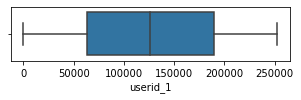

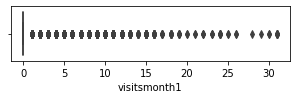

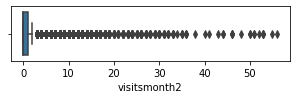

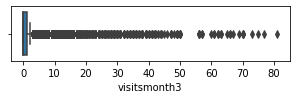

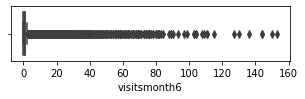

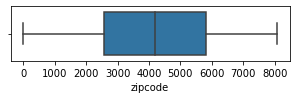

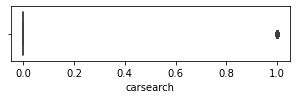

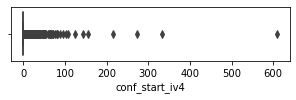

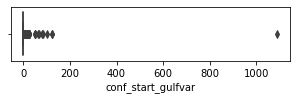

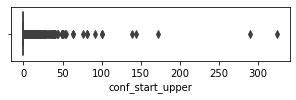

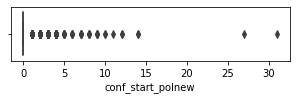

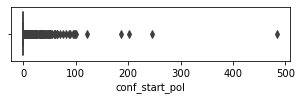

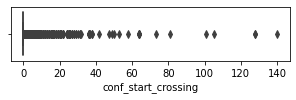

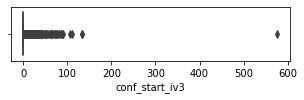

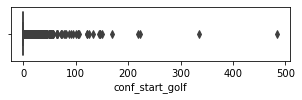

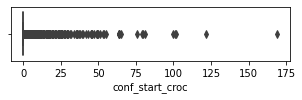

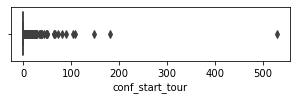

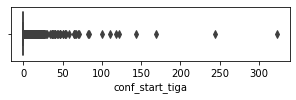

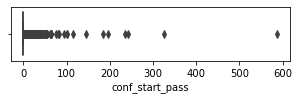

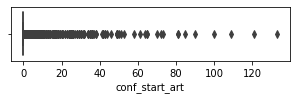

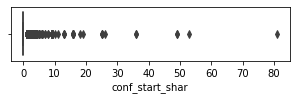

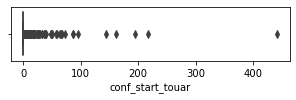

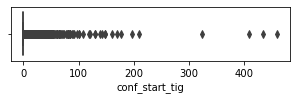

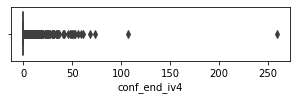

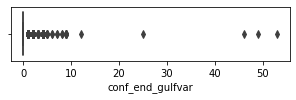

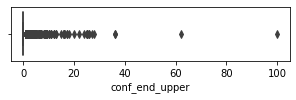

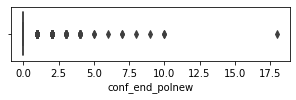

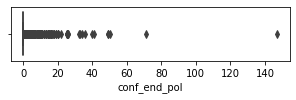

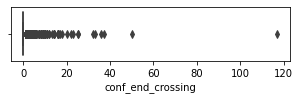

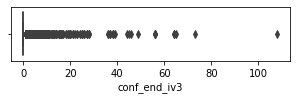

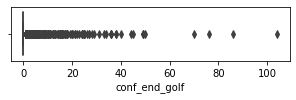

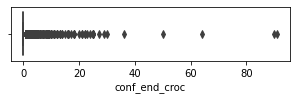

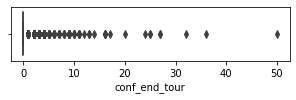

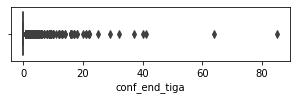

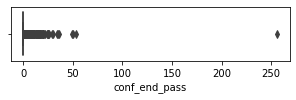

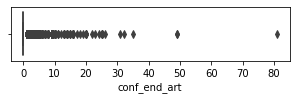

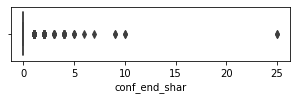

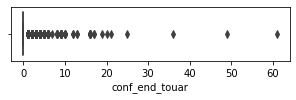

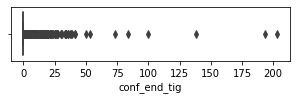

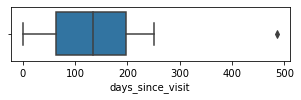

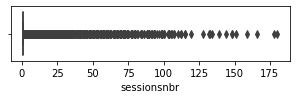

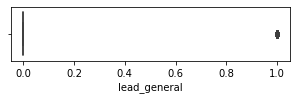

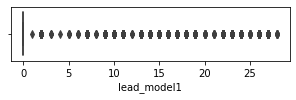

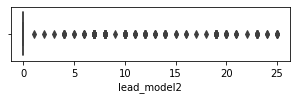

In [6]:
mpl.rc('figure', max_open_warning = 0)

for column in cookie_data_encoded:
    plt.figure(figsize=(5,1))
    sns.boxplot(data=cookie_data_encoded, x=column)

For the "conf_start_..." and "cond_end_..." columns we set a threshold of 200 and 80 to filter outliers.

In [7]:
cookie_data_copy = cookie_data.copy()
cookie_data_encoded_copy = cookie_data_encoded.copy()

for col in cookie_data.columns.to_list():

    if  'days_since_visit' in col:
        upper_bound = 400.0
    elif 'conf_' not in col:
        continue
        
    if 'conf_start_' in col:
        upper_bound = 200.0
            
    if 'conf_end_' in col:
        upper_bound = 80.0
        
    print("Processing", col)
    
    n_remove_above = cookie_data_encoded[col][cookie_data_encoded[col] > upper_bound].size       
    print("Entries above upper bound (" + str(upper_bound) + "):", n_remove_above)
    cookie_data_copy = cookie_data_copy.loc[cookie_data_encoded[col] <= upper_bound]
    cookie_data_encoded_copy = cookie_data_encoded_copy.loc[cookie_data_encoded[col] <= upper_bound]
    
    n_remove_below = cookie_data_encoded[col][cookie_data_encoded[col] < 0.0].size
    print("Entries below lower bound (" + str(0.0) + "):", n_remove_below)
    cookie_data_copy = cookie_data_copy.loc[cookie_data_encoded[col] >= 0.0]
    cookie_data_encoded_copy = cookie_data_encoded_copy.loc[cookie_data_encoded[col] >= 0.0]
    
    print("###########################################################")
    

print("Old Shape:", cookie_data_encoded.shape)
print("New Shape:", cookie_data_encoded_copy.shape)
    
cookie_data = cookie_data_copy
cookie_data_encoded = cookie_data_encoded_copy

Processing conf_start_iv4
Entries above upper bound (200.0): 4
Entries below lower bound (0.0): 0
###########################################################
Processing conf_start_gulfvar
Entries above upper bound (200.0): 1
Entries below lower bound (0.0): 0
###########################################################
Processing conf_start_upper
Entries above upper bound (200.0): 2
Entries below lower bound (0.0): 0
###########################################################
Processing conf_start_polnew
Entries above upper bound (200.0): 0
Entries below lower bound (0.0): 0
###########################################################
Processing conf_start_pol
Entries above upper bound (200.0): 3
Entries below lower bound (0.0): 0
###########################################################
Processing conf_start_crossing
Entries above upper bound (200.0): 0
Entries below lower bound (0.0): 0
###########################################################
Processing conf_start_iv3
Entries abov

## 6 Drop Columns With High Corrolation to Other Columns

We use a correlation matrix based on Pearson's correlation coefficient to identify variables with high correlation. We drop all dependent variables for this analysis, as we only want to have a look at the independent variables.

<AxesSubplot:>

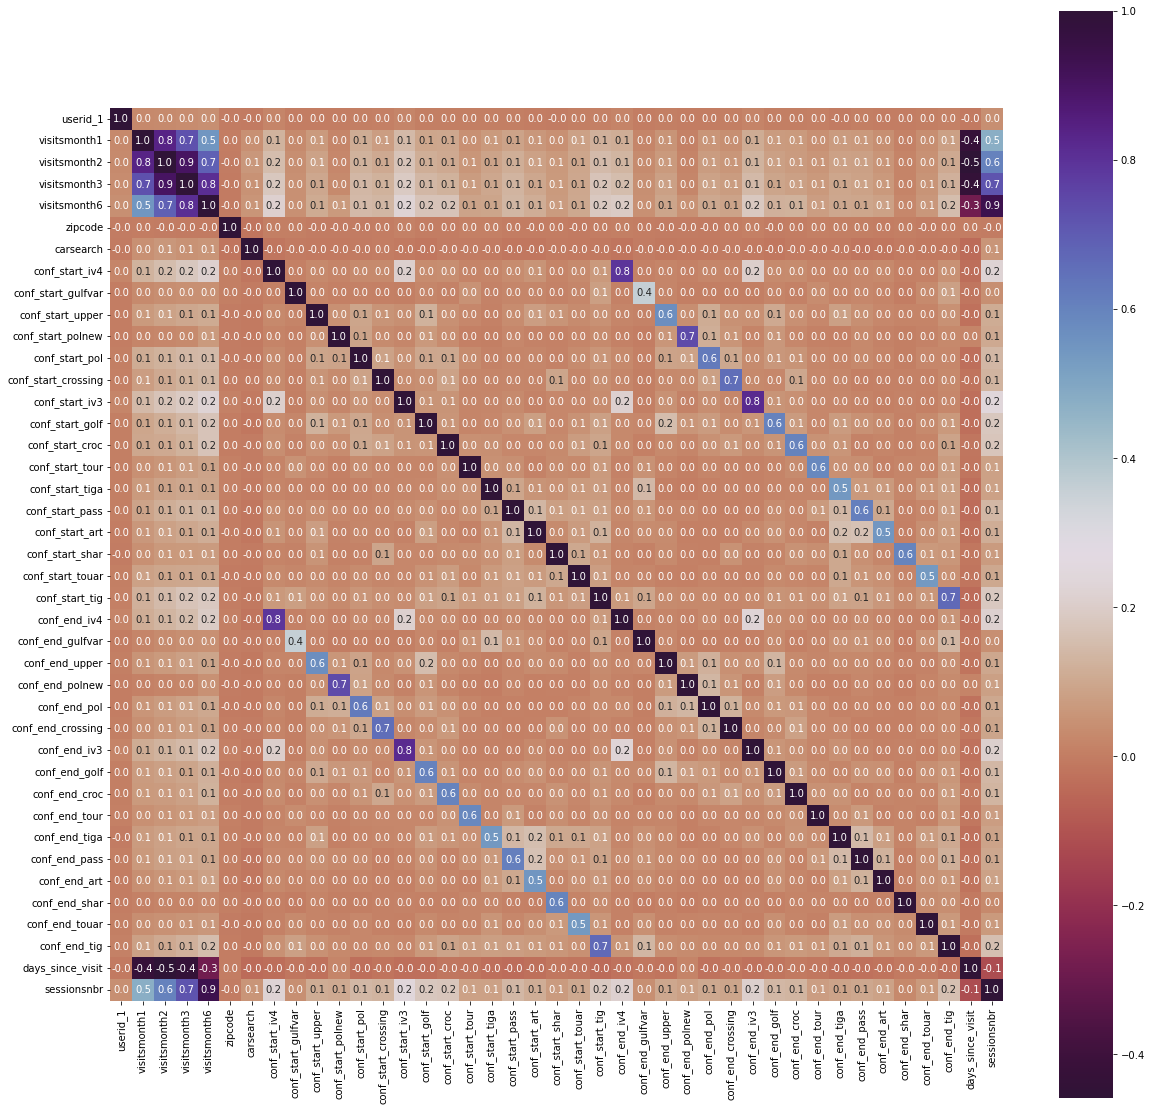

In [8]:
corrl_data = cookie_data_encoded.drop(columns=['lead_general', 'lead_model1', 'lead_model2'])

corrl = corrl_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrl, cbar=True, square=True, fmt=".1f", annot=True, cmap="twilight_shifted_r")

A high correlation between two variables that are supposed to be independent results in a undesirable Multicollinearity. We assume a "high" correlation if the absolute value of the correlation is greater than or equal to 0.8.

We have corrolation between the following variables:
- visitsmonth1 and visitsmonth2
- visitsmonth2 and visitsmonth3
- visitsmonth3 and visitsmonth6
- visitsmonth6 and sessionsnbr
- conf_start_iv3 and conf_end_iv3
- conf_start_iv4 and conf_end_iv4

To decide, which column of each pair to drop, we have a look at the Variance Inflation Factor (VIF).

In [9]:
vif_analysis = pd.DataFrame()
vif_analysis["VIF"] = [variance_inflation_factor(cookie_data_encoded,i) for i in range(cookie_data_encoded.shape[1])]
vif_analysis["Features"] = cookie_data_encoded.columns

vif_analysis[vif_analysis['Features'].isin([
    'visitsmonth1',
    'visitsmonth2',
    'visitsmonth3',
    'visitsmonth6',
    'sessionsnbr',
])]

,VIF,Features
1,3.712227,visitsmonth1
2,9.673134,visitsmonth2
3,9.716381,visitsmonth3
4,15.682184,visitsmonth6
40,13.144335,sessionsnbr


In [10]:
vif_analysis[vif_analysis['Features'].isin([
    'conf_start_iv3',
    'conf_end_iv3'
])]

,VIF,Features
13,3.120861,conf_start_iv3
29,3.098234,conf_end_iv3


In [11]:
vif_analysis[vif_analysis['Features'].isin([
    'conf_start_iv4',
    'conf_end_iv4',
])]

,VIF,Features
7,2.751465,conf_start_iv4
23,2.761594,conf_end_iv4


Also, we see that
- VIF(visitsmonth6) > VIF(sessionsnbr) > VIF(visitsmonth3) > VIF(visitsmonth2) > VIF(visitsmonth1)
- VIF(conf_start_iv3) > VIF(conf_end_iv3)
- VIF(conf_end_iv4) > VIF(conf_start_iv4)

We will drop "visitsmonth6", "conf_start_iv3", and "conf_end_iv4" in the first place.

In [12]:
columns_to_drop = [
    'visitsmonth6',
    'conf_start_iv3',
    'conf_end_iv4'
]

cookie_data = cookie_data.drop(columns=columns_to_drop)
cookie_data_encoded = cookie_data_encoded.drop(columns=columns_to_drop)

We run the analysis again to check the VIF of "visitsmonth1", "visitsmonth2", and "visitsmonth3". Among these variables there exists a dependency that also included "visitsmonth6". That's why we condunct a separate analysis once we dropped that column to get an unbiased result.

In [13]:
vif_analysis = pd.DataFrame()
vif_analysis["VIF"] = [variance_inflation_factor(cookie_data_encoded,i) for i in range(cookie_data_encoded.shape[1])]
vif_analysis["Features"] = cookie_data_encoded.columns

vif_analysis[vif_analysis['Features'].isin([
    'visitsmonth1',
    'visitsmonth2',
    'visitsmonth3'
])]

,VIF,Features
1,3.708858,visitsmonth1
2,9.636434,visitsmonth2
3,8.492540,visitsmonth3


We can see, that "visitsmonth2" has the highest VIF now. Again, we can solve the Multicollinearity problem of the two loft over pairs by dropping a column.

In [14]:
cookie_data = cookie_data.drop(columns='visitsmonth2')
cookie_data_encoded = cookie_data_encoded.drop(columns='visitsmonth2')

We check again, if we solved all issues regarding Multicollinearity.

<AxesSubplot:>

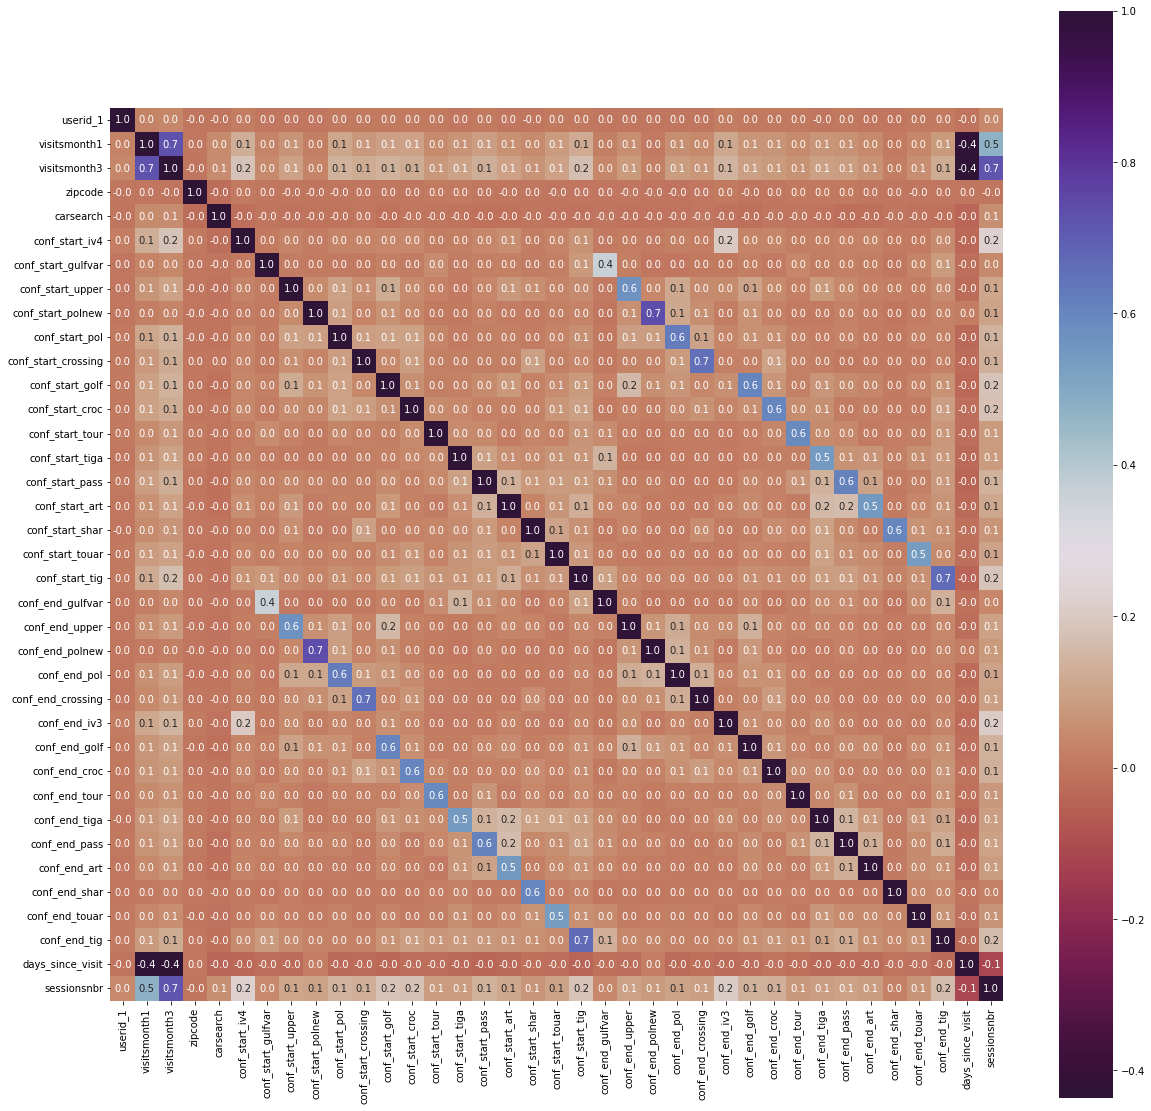

In [15]:
# Drop column "lead_general" for this analysis, as we only want to have a look at the independent variables.
corrl_data = cookie_data_encoded.drop(columns=['lead_general', 'lead_model1', 'lead_model2'])

corrl = corrl_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrl, cbar=True, square=True, fmt=".1f", annot=True, cmap="twilight_shifted_r")

The highest correlation coefficient we can observe is 0.7. Therefore, no more actions are needed.

## 7 Export the Prepared Data Set

In [16]:
cookie_data.to_csv('./TU/Cookie_prepared.csv', sep=';', index=False)
cookie_data

,userid_1,visitsmonth1,visitsmonth3,zipcode,carsearch,conf_start_iv4,conf_start_gulfvar,conf_start_upper,conf_start_polnew,conf_start_pol,...,conf_end_pass,conf_end_art,conf_end_shar,conf_end_touar,conf_end_tig,days_since_visit,sessionsnbr,lead_general,lead_model1,lead_model2
0,1,0,0,48336,0,0,0,0,0,0,...,0,0,0,0,0,139,1,0,0,0
1,2,0,0,99986,0,0,0,0,0,0,...,0,0,0,0,0,203,1,0,0,0
2,3,0,0,656008,0,0,0,0,0,0,...,0,0,0,0,0,152,1,0,0,0
3,4,0,1,68169,0,0,0,0,0,0,...,0,0,0,0,0,43,1,0,0,0
4,5,0,0,90455,0,0,0,0,0,0,...,0,0,0,0,3,124,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252249,252250,0,0,76229,0,0,0,0,0,0,...,0,0,0,0,0,223,2,1,Crossing,0
252250,252251,2,2,24103,0,0,0,0,0,0,...,0,0,0,0,0,5,2,1,IV3,0
252251,252252,0,0,2344,0,0,0,0,0,0,...,0,0,0,0,0,136,4,1,0,0
252252,252253,0,0,33739,0,0,0,0,0,0,...,0,0,0,0,0,155,4,1,Tour,0
